In [2]:
import pandas as pd
import numpy as np 
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [3]:
train = pd.read_csv('data/transcript_balanced_train.csv')
test = pd.read_csv('data/transcript_balanced_test.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/transcript_balanced_train.csv'

In [3]:
x_train = train.drop(['label'], axis=1)
y_train = train['label']
X_test = test.drop(['label'], axis=1)
y_test = test['label']

In [4]:
y_train.value_counts()

label
0    93715
1    93715
Name: count, dtype: int64

In [5]:
y_test.value_counts()

label
0    22648
1     1184
Name: count, dtype: int64

In [5]:
X_train.head()

,transcript_position,avg_central_mean,avg_1+flank_std,med_central_std,med_central_mean,med_1+flank_std,std_1-flank_std,std_1-flank_mean,std_central_std,std_central_mean,std_1+flank_std,std_1+flank_mean,seq_left,seq_center,seq_right
0,244,125.913514,4.386989,6.650,126.0,3.440,1.843025,4.944365,3.302671,2.765244,2.906225,2.522168,1,4,16
1,261,107.889535,3.016599,3.000,108.0,2.660,1.689167,2.981182,1.237045,3.526528,1.466295,2.492530,6,2,10
2,316,98.947027,2.087146,3.780,99.5,1.910,1.311103,1.492577,0.893481,3.203816,0.800496,1.484341,12,0,2
3,332,97.836500,2.236520,2.635,97.5,2.135,2.459317,3.202963,1.393868,1.928009,0.741771,3.494937,2,6,3
4,368,121.954545,4.260253,5.660,122.0,4.160,2.743228,2.664643,1.753894,2.177236,1.341822,2.379045,3,9,12


In [6]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(X_train)
normalised_X_train = pd.DataFrame(d, columns=X_train.columns)
normalised_X_train.head()


,transcript_position,avg_central_mean,avg_1+flank_std,med_central_std,med_central_mean,med_1+flank_std,std_1-flank_std,std_1-flank_mean,std_central_std,std_central_mean,std_1+flank_std,std_1+flank_mean,seq_left,seq_center,seq_right
0,0.012869,0.774042,0.287885,0.463500,0.781312,0.201650,0.048485,0.280016,0.101848,0.226398,0.090561,0.146461,0.043478,0.235294,0.695652
1,0.013777,0.410623,0.157972,0.142480,0.423459,0.130156,0.043891,0.152029,0.033255,0.310842,0.042812,0.144293,0.260870,0.117647,0.434783
2,0.016714,0.230314,0.069860,0.211082,0.254473,0.061412,0.032605,0.054982,0.021846,0.275046,0.020733,0.070529,0.521739,0.000000,0.086957
3,0.017568,0.207922,0.084021,0.110378,0.214712,0.082035,0.066883,0.166488,0.038463,0.133529,0.018786,0.217634,0.086957,0.352941,0.130435
4,0.019491,0.694217,0.275871,0.376429,0.701789,0.267644,0.075359,0.131393,0.050418,0.161175,0.038684,0.135990,0.130435,0.529412,0.521739


In [36]:
normalised_X_train.describe()

,transcript_position,avg_central_mean,avg_1+flank_std,med_central_std,med_central_mean,med_1+flank_std,std_1-flank_std,std_1-flank_mean,std_central_std,std_central_mean,std_1+flank_std,std_1+flank_mean,seq_left,seq_center,seq_right
count,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000
mean,0.085326,0.508940,0.154020,0.305686,0.520414,0.132076,0.041002,0.174722,0.057859,0.295164,0.037428,0.147859,0.483273,0.496438,0.596488
std,0.072670,0.228647,0.075383,0.165956,0.227870,0.064208,0.020944,0.084652,0.027575,0.103189,0.021194,0.049804,0.313065,0.264055,0.294130
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.039141,0.261410,0.097079,0.163588,0.273051,0.085876,0.026905,0.116227,0.035821,0.219571,0.020538,0.112853,0.130435,0.294118,0.391304
50%,0.068938,0.595979,0.145802,0.284984,0.604371,0.122314,0.039776,0.157656,0.060753,0.291887,0.035751,0.143676,0.521739,0.529412,0.608696
75%,0.108453,0.682189,0.197189,0.415128,0.697689,0.165445,0.053684,0.218044,0.076794,0.365810,0.049810,0.177976,0.739130,0.647059,0.869565
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
d = scaler.fit_transform(X_test)
normalised_X_test = pd.DataFrame(d, columns=X_test.columns)
normalised_X_test.head()

,transcript_position,avg_central_mean,avg_1+flank_std,med_central_std,med_central_mean,med_1+flank_std,std_1-flank_std,std_1-flank_mean,std_central_std,std_central_mean,std_1+flank_std,std_1+flank_mean,seq_left,seq_center,seq_right
0,0.054772,0.689752,0.111903,0.727019,0.693878,0.107848,0.189319,0.254995,0.077564,0.365202,0.032594,0.026947,0.478261,1.000000,0.913043
1,0.058768,0.791245,0.128262,0.324048,0.795918,0.100253,0.087639,0.142416,0.062153,0.252199,0.044891,0.043219,0.130435,0.647059,0.869565
2,0.061236,0.778200,0.168967,0.438254,0.795918,0.157468,0.058464,0.219995,0.096518,0.290691,0.052945,0.067706,0.304348,0.176471,0.608696
3,0.070052,0.721716,0.187557,0.418756,0.714286,0.172658,0.144078,0.161922,0.131265,0.392006,0.053597,0.064235,0.130435,0.647059,0.869565
4,0.081335,0.708707,0.173422,0.592386,0.714286,0.151392,0.110263,0.233199,0.114632,0.424743,0.056727,0.021868,0.478261,1.000000,1.000000


### Innovation: Bayesian Optimisation with Hyperopt
source: https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning

In [17]:
# version 6: reg:logistic 
best_model = xgb.XGBClassifier(colsample_bytree = 0.7445107941187324, gamma= 7.422940033575507, max_depth= 8, 
min_child_weight = 5, reg_alpha = 137, reg_lambda = 0.63311680578766,n_estimators=180, objective='reg:logistic')
best_model.fit(normalised_X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7445107941187324, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=7.422940033575507,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, objective='reg:logistic', ...)

In [18]:
y_pred = best_model.predict(normalised_X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     22648
           1       0.41      0.50      0.45      1184

    accuracy                           0.94     23832
   macro avg       0.69      0.73      0.71     23832
weighted avg       0.95      0.94      0.94     23832



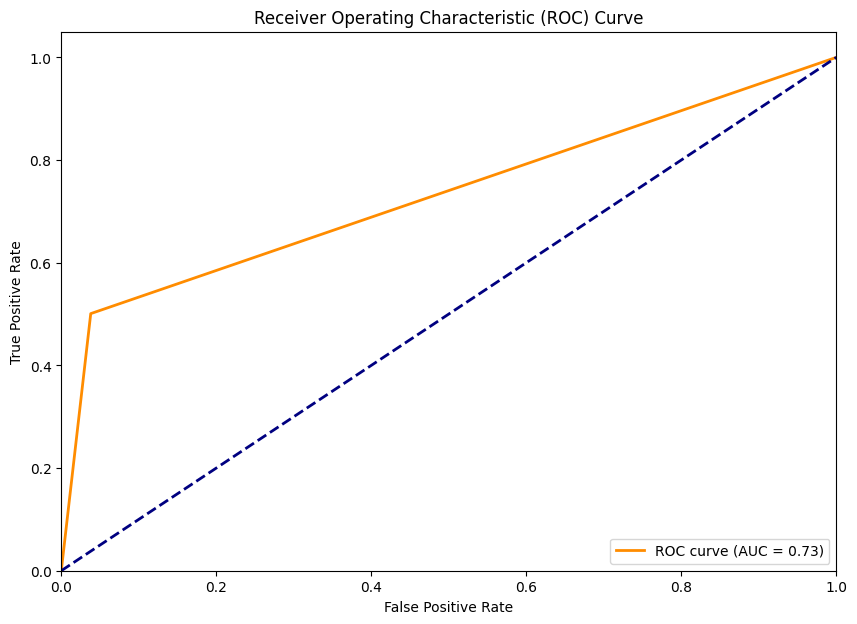

In [19]:
# ROC AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

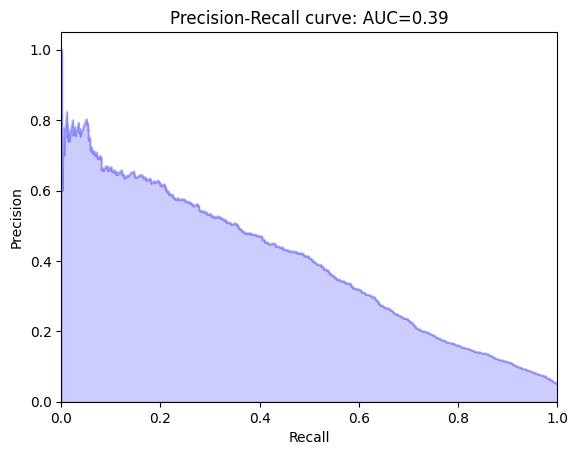

In [20]:
# Get predicted probabilities for the positive class (class 1)
from sklearn.metrics import average_precision_score, precision_recall_curve
y_pred_prob = best_model.predict_proba(normalised_X_test)[:, 1]

# Calculate PR AUC
pr_auc = average_precision_score(y_test, y_pred_prob)

# Plot Precision-Recall curve (optional)
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AUC={0:0.2f}'.format(pr_auc))
plt.show()


In [26]:
# output probabiliy 
prob = best_model.predict_proba(normalised_X_test)[:,1]
transcript_id = test['transcript_id']
transcript_position = test['transcript_position']
data = {
    'transcript_id': transcript_id,
    'transcript_position': transcript_position,
    'probability': prob
}

# Create a DataFrame from the data dictionary
output = pd.DataFrame(data)

output.head()



,transcript_id,transcript_position,probability
0,ENST00000005257,470,0.139828
1,ENST00000005257,504,0.278687
2,ENST00000005257,525,0.031150
3,ENST00000005257,600,0.519034
4,ENST00000005257,696,0.161121


In [27]:
test.head()

,transcript_id,transcript_position,gene_id,avg_central_mean,avg_1+flank_std,med_central_std,med_central_mean,med_1+flank_std,std_1-flank_std,std_1-flank_mean,std_central_std,std_central_mean,std_1+flank_std,std_1+flank_mean,label,seq_left,seq_center,seq_right
0,ENST00000005257,470,ENSG00000006451,121.032258,2.513839,9.26,121.0,2.390,3.070013,4.203054,1.736880,3.126204,0.869722,1.267762,0,11,17,21
1,ENST00000005257,504,ENSG00000006451,126.029412,2.674206,4.92,126.0,2.315,1.562898,2.673237,1.436917,2.345023,1.113461,1.576460,0,3,11,20
2,ENST00000005257,525,ENSG00000006451,125.387097,3.073226,6.15,126.0,2.880,1.130465,3.727447,2.105785,2.611110,1.273123,2.040985,0,7,3,14
3,ENST00000005257,600,ENSG00000006451,122.606061,3.255455,5.94,122.0,3.030,2.399447,2.938300,2.782057,3.311499,1.286042,1.975153,0,3,11,20
4,ENST00000005257,696,ENSG00000006451,121.965517,3.116897,7.81,122.0,2.820,1.898227,3.906871,2.458343,3.537803,1.348092,1.171399,0,11,17,23


In [28]:
import joblib
joblib.dump(best_model, 'bext_xgboost.pkl')

['bext_xgboost.pkl']